## Validating the feature filter component

In [1]:
import torch
import numpy as np

from datasets.dataset import transform_dataset, kfold_dataset
from R2Ntab import train as train, R2Ntab
import matplotlib.pyplot as plt

In [2]:
# Read datasets
dummy_features = 30
name = 'heloc'
X, Y, X_headers, Y_headers = transform_dataset(name, method='onehot-compare', negations=False, labels='binary', dummy_features=dummy_features)
datasets = kfold_dataset(X, Y, shuffle=1)
X_train, X_test, Y_train, Y_test = datasets[0]

train_set = torch.utils.data.TensorDataset(torch.Tensor(X_train.to_numpy()), torch.Tensor(Y_train))
test_set = torch.utils.data.TensorDataset(torch.Tensor(X_test.to_numpy()), torch.Tensor(Y_test))

In [3]:
# Train R2N-tab
# Default learning rate (1e-2), and_lam (1e-2), and and_lam (1e-5) usually work the best. A large epochs number is necessary for a sparse rule set i.e 10000 epochs.
index = X_train.shape[1]-dummy_features
net = R2Ntab(train_set[:][0].size(1), 50, 1, cancel_rate=0.1)
dummies = train(net, train_set, test_set=test_set, device='cpu', lr_cancel=5e-3, lr_rules=1e-2, epochs=1000, batch_size=400,
      and_lam=1e-2, or_lam=1e-5, num_alter=500, dummy_index=index)

Epoch: 100%|██████████| 1000/1000 [11:29<00:00,  1.45it/s, loss=0.629, epoch accu=0.639, test accu=0.728, num rules=18, sparsity=0.987]


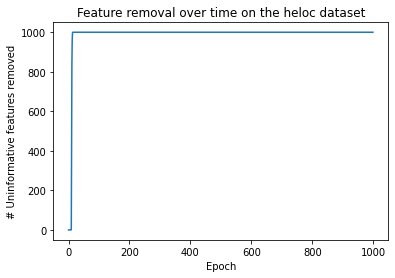

In [7]:
plt.plot(dummies)
plt.title("Feature removal over time on the heloc dataset")
plt.ylabel("# Uninformative features removed")
plt.xlabel("Epoch")
plt.show()